In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import wavfile
from IPython import display

In [54]:
def sine_wave(f_0, sr=44100, a=1, sec=1):
    """
    create sine wave.
    
    Parameters
    ----------
    f_0 : int or float
        frequency [Hz]
    sr : int
        sampling rate [Hz]
    a : int
        amplitude
    sec : int or float
        seconds [s]
    
    Returns
    ----------
    s : list(float)
        sine wave
    """
    
    t = np.arange(0, sec, 1/sr)
    s = a * np.sin(2.0 * np.pi * f_0 * t)
    
    return s

In [19]:
def frequency_response(s, sr=44100):
    """
    analyze signal frequency with FFT
    
    Parameters
    ----------
    s : list[float]
        signal
    sr : int
        sampling rate
    
    Returns
    ----------
    amp : list
        amplitude
    freq : list
        frequency
    """
    
    # 信号を高速フーリエ変換(FFT)，時間領域から周波数領域に変換
    amp = np.abs(np.fft.fft(s))
    
    # 周波数の取得，np.fft.fftfreq(データ，サンプリング周波数)
    freq = np.fft.fftfreq(s.shape[0], d=1.0/44100)
    
    return amp, freq

In [16]:
def normal_plot(x, y, title):
    plt.plot(x, y)
    plt.title(title)

def plot_signal(t, s, title):
    plt.plot(t[:1000], s[:1000])
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.title(title)

## 波形と周波数特性
$sine$波の**振幅**と**周期**は，それぞれ音の**大きさ**と**高さ**に対応している．周期が短いと音は高くなる．  
$sine$波の音の高さは周期に反比例するため，周期の逆数として定義される**周波数**によって比較することが一般的．
周期を$t_0$とすると，$$frequency \ [Hz] = \frac{1}{t_0[sec]}$$と表せる．
振幅$a$，周波数$f_0$の$sine$波は時刻$t$を変数として，$$s(t) = a \ sin(2 \pi f_0 t)$$と表せる．

$sine$波は横軸を時間，縦軸を振幅として波形そのものをグラフにすることが一般的だが，波形に含まれる$sine$波の配合比率をグラフにした**周波数特性**$(frequency \ response)$で表現することもある．こちらは横軸を周波数，縦軸を振幅としたものである．  
$sine$波のようにたった一つの周波数成分しか含まないものは**純音**と呼ばれ，その周波数特性は縦線で表されるため**線スペクトル**と呼ばれる．

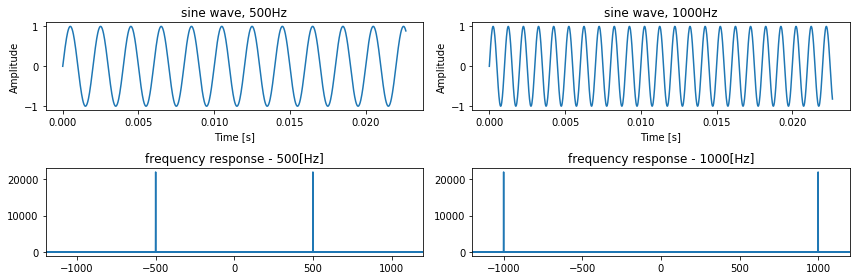

In [28]:
sec, sr = 1, 44100           # 再生時間とサンプリング周波数
t = np.arange(0, sec, 1/sr)  # 時間軸
s_500 = sine_wave(500)       # 500Hzのサイン波
s_1000 = sine_wave(1000)     # 1000Hzのサイン波

# 周波数特性()
amp_500, fr_500 = frequency_response(s_500)
amp_1000, fr_1000 = frequency_response(s_1000)

# プロット
plt.figure(figsize=(12, 4))
plt.subplot(221)
plot_signal(t, s_500, 'sine wave, 500Hz')
plt.subplot(222)
plot_signal(t, s_1000, 'sine wave, 1000Hz')
plt.subplot(223)
normal_plot(fr_500, amp_500, 'frequency response - 500[Hz]')
plt.xlim(-1200, 1200)
plt.subplot(224)
normal_plot(fr_1000, amp_1000, 'frequency response - 1000[Hz]')
plt.xlim(-1200, 1200)

plt.tight_layout()
plt.show()

In [29]:
# 実際に再生してみる
display.Audio(s_500, rate=sr)

In [30]:
display.Audio(s_1000, rate=sr)

## 12平均律(equal temperament)
音階は1オクターブあたり12個の音で構成されている．  
隣り合った音は周波数にして$ 2^{1/12} $倍，1オクターブ高い音は周波数にして$2$倍

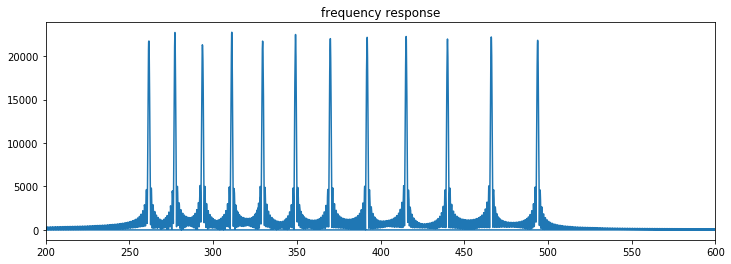

In [58]:
freq = 261.626      # ド(C4)の音(261.626Hz)
step = 2 ** (1/12)  # 次の音への倍率
equal_temperament = []
all_sound = []

# 平均律の音階を作成
for i in range(1, 13):
    sound = sine_wave(freq, sec=1)
    all_sound.append(sound)
    equal_temperament = np.append(equal_temperament, sound)
    freq *= step

# 周波数特性
amp, freq = frequency_response(equal_temperament)
    
plt.figure(figsize=(12, 4))
normal_plot(freq, amp, 'frequency response')
plt.xlim(200, 600)

plt.show()
display.Audio(equal_temperament, rate=sr)

In [61]:
# ドレミファソラシドの8音
phrase = []
phrase_num = [0, 2, 4, 5, 7, 9, 11]

for i in phrase_num:
    phrase.extend(all_sound[i])

# 1オクターブ上の音を追加
sound = sine_wave(261.626 * 2)
phrase.extend(sound)

display.Audio(phrase, rate=sr)